In [ ]:

import pandas as pd
import numpy as np



In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
275,ham,Thanx...
4417,ham,"When you get free, call me"
5001,ham,You still around? Looking to pick up later
4812,ham,i can call in &lt;#&gt; min if thats ok
4886,spam,Todays Vodafone numbers ending with 4882 are s...


In [ ]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1419,ham,\Speak only when you feel your words are bette...
3841,ham,"chile, please! It's only a &lt;DECIMAL&gt; h..."
3210,ham,"OH YEAH,AND HAV A GREAT TIME IN NEWQUAY-SEND M..."
4958,ham,"What i mean was i left too early to check, cos..."
5329,ham,"Sir, waiting for your letter."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

## 2.EDA

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


([<matplotlib.patches.Wedge at 0x7e3feaacb010>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

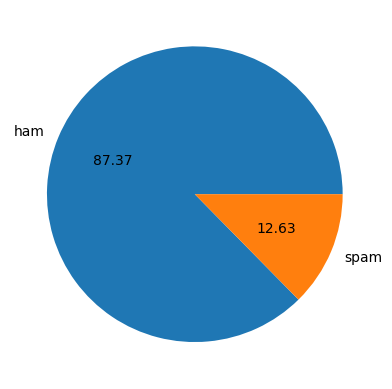

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham',"spam"],autopct="%0.2f")

In [ ]:
# Data is imbalanced (!exclamation mark)

In [ ]:
df.shape

(5169, 2)

In [ ]:
!pip install nltk
import nltk #The Python Natural Language Toolkit library
nltk.download("punkt") #This command downloads a pre-trained model called punkt

from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

nltk.download("punkt", download_dir="/usr/share/nltk_data")  # download to a fixed location
nltk.data.path.append("/usr/share/nltk_data")                # add that path manually


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x))) #(this not work use other option)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))




In [ ]:
df

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,30
5568,0,Will Ì_ b going to esplanade fr home?,8
5569,0,"Pity, * was in mood for that. So...any other s...",10
5570,0,The guy did some bitching but I acted like i'd...,26


In [ ]:
#from nltk.tokenize import sent_tokenize

#df['num_sent'] = df['text'].apply(lambda x: len(sent_tokenize(x))) #(notwork , use other method)

In [ ]:
import re
df['num_sentences'] = df['text'].apply(lambda x: len(re.split(r'[.!?]', str(x))) - 1)



In [ ]:
df['num_sentences'] = df['text'].apply(lambda x: len(str(x).split('.')))

In [ ]:
df

,target,text,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",20,9
1,0,Ok lar... Joking wif u oni...,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,2
3,0,U dun say so early hor... U c already then say...,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",13,1
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,30,5
5568,0,Will Ì_ b going to esplanade fr home?,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",10,5
5570,0,The guy did some bitching but I acted like i'd...,26,1


In [ ]:

# Step 2: Count words and sentences using NLTK

#df['num_sentences'] = df['text'].apply(lambda x: len(sent_tokenize(x)))

#print(df)


In [ ]:
#df['text'] = df['text'].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",20,9,111
1,0,Ok lar... Joking wif u oni...,6,7,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,2,155
3,0,U dun say so early hor... U c already then say...,11,7,49
4,0,"Nah I don't think he goes to usf, he lives aro...",13,1,61


In [ ]:
# num of words
#df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",20,9,111
1,0,Ok lar... Joking wif u oni...,6,7,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,2,155
3,0,U dun say so early hor... U c already then say...,11,7,49
4,0,"Nah I don't think he goes to usf, he lives aro...",13,1,61


In [ ]:
#df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",20,9,111
1,0,Ok lar... Joking wif u oni...,6,7,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,2,155
3,0,U dun say so early hor... U c already then say...,11,7,49
4,0,"Nah I don't think he goes to usf, he lives aro...",13,1,61


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.934030
std,58.236293,11.068488,2.541852
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,4.000000
max,910.000000,171.000000,42.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.916519
std,56.358207,11.116240,2.638732
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,18.000000,4.000000
max,910.000000,171.000000,42.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.055130
std,30.137753,5.967672,1.725848
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,14.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

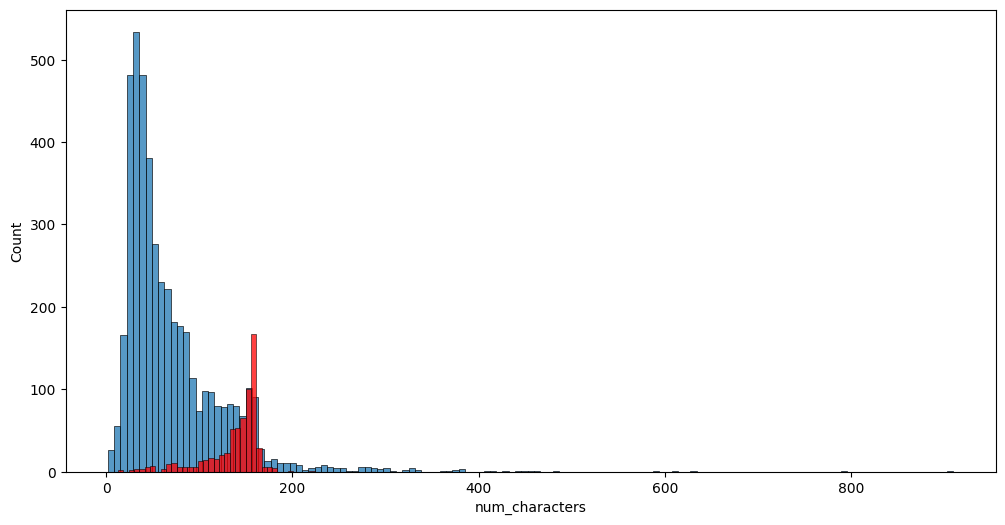

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

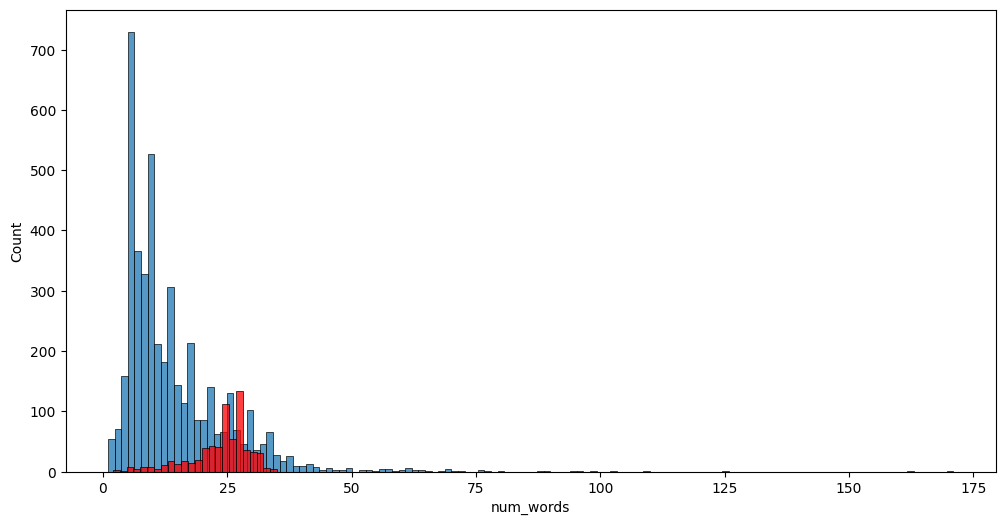

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

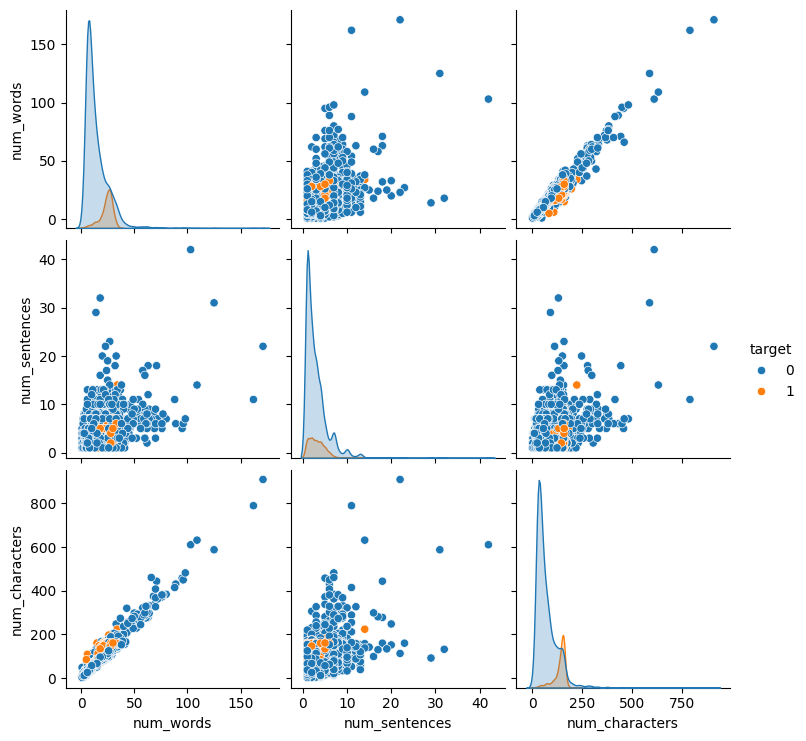

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

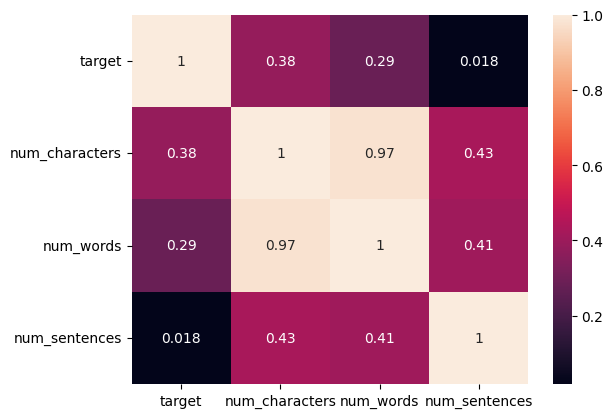

In [ ]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
import nltk # extra add
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_words,num_sentences,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",20,9,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,6,7,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,11,7,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",13,1,61,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

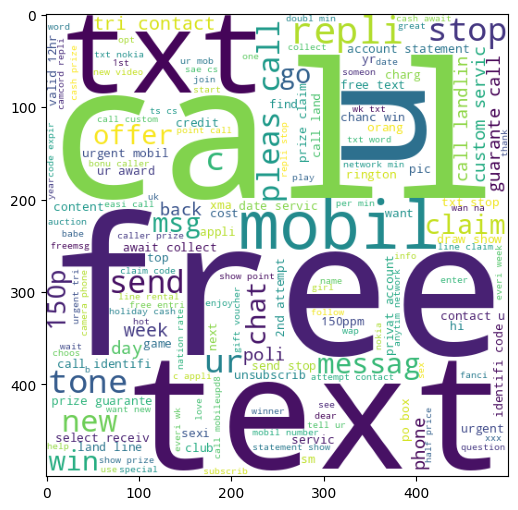

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

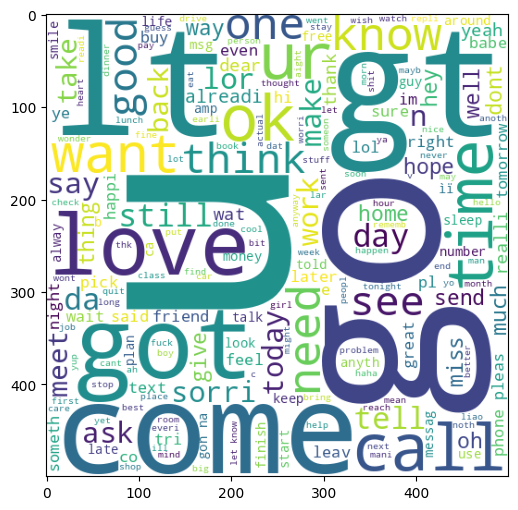

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_words,num_sentences,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",20,9,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,6,7,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,11,7,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",13,1,61,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9939

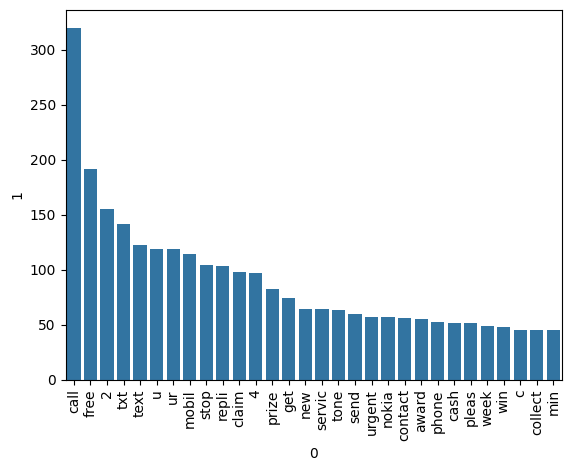

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

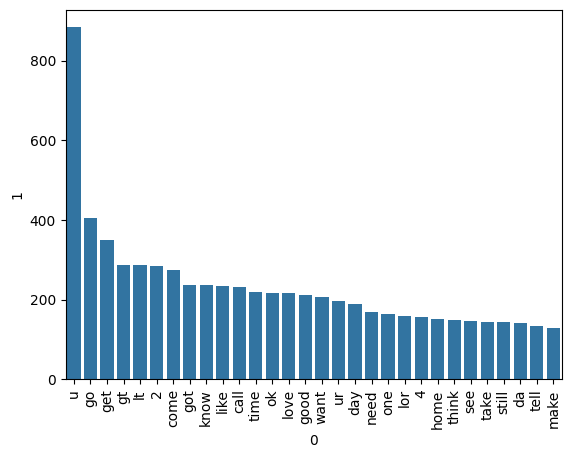

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_words,num_sentences,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",20,9,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,6,7,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,11,7,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",13,1,61,nah think goe usf live around though


## 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf --> MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, classification_report

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    target_names = ['ham', 'spam']
    print(classification_report(y_test, y_pred, target_names=target_names))
    return accuracy,precision,recall

In [ ]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       896
        spam       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



(0.9709864603481625, 1.0, 0.782608695652174)

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision, current_recall = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ", current_recall)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       896
        spam       0.97      0.84      0.90       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.98      0.98      1034

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
Recall -  0.8405797101449275
              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       896
        spam       1.00      0.29      0.45       138

    accuracy                           0.91      1034
   macro avg       0.95      0.64      0.70      1034
weighted avg       0.91      0.91      0.88      1034

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
Recall -  0.2898550724637681
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       896
        spam       1.00      0.78      0.88       1

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.976789,0.975000
0,SVC,0.975822,0.974790
4,LR,0.956480,0.969697
8,ETC,0.977756,0.967480
10,xgb,0.970986,0.950000
9,GBDT,0.950677,0.930693
7,BgC,0.959381,0.869231
6,AdaBoost,0.923598,0.839080


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.976789
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.956480
5,ETC,Accuracy,0.977756
6,xgb,Accuracy,0.970986
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.959381
9,AdaBoost,Accuracy,0.923598


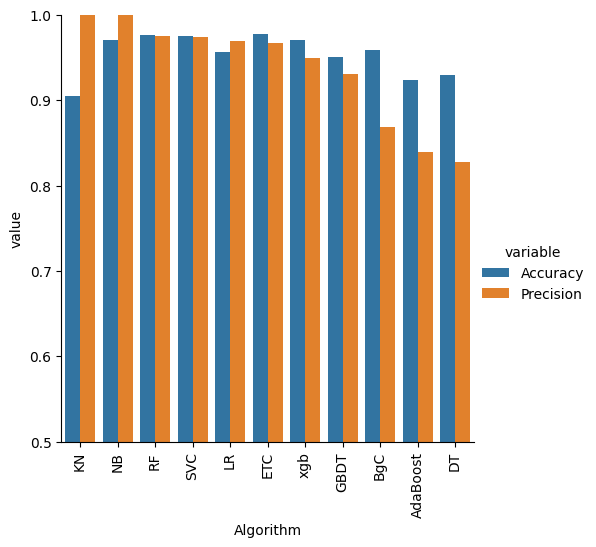

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,LR,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697
5,ETC,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480
6,xgb,0.970986,0.950000,0.970986,0.950000,0.970986,0.950000,0.970986,0.950000
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,BgC,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231
9,AdaBoost,0.923598,0.839080,0.923598,0.839080,0.923598,0.839080,0.923598,0.839080


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9834710743801653


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394
